In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def convertToBinaryClassifier(x, cutoff=3.75):
    return 1 if x >= cutoff else 0

In [3]:
# read in data
df = pd.read_csv(
    '..\data-201-resources-master\epicurious-recipes-with-rating-and-nutrition\epi_r.csv')
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

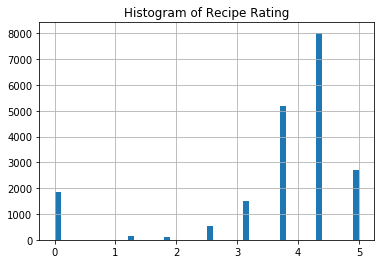

In [5]:
df.rating.hist(bins=50)
plt.title('Histogram of Recipe Rating')
plt.show()

In [6]:
null_table = df.isnull().sum()
null_table[null_table > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
# cleanup data, by dropping columns with null & non-numeric columns
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], axis=1)
Y = df['rating']
# set model
svr = SVR()
svr.fit(X, Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

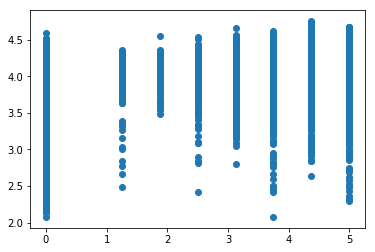

In [8]:
plt.scatter(Y, svr.predict(X))
plt.show()

In [9]:
print(svr.score(X, Y))
print(cross_val_score(svr, X, Y, cv=5))

0.03856570651298896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.01818511 0.026411   0.03037705 0.01957949 0.02451197]


In [10]:
# Methodology of selecting smaller group of important festures for model
# selection 1:  One feature becomes more importsnt in rating wnen it is more used for recipes. 
#               The value of the feasture takes 1.
#               So we calculate sum of all the values for each feature. Then select the features
#               with largest sum values


In [11]:
# reserved features
X = pd.DataFrame()
X['bon_appatit'] = df['bon appétit']
X['dairy free'] = df['dairy free']
X['fish'] = df['fish'] 
X['high fiber'] = df['high fiber'] 
X['kosher'] = df['kosher']
X['low cal'] = df['low cal'] 
X['pescatarian'] = df['pescatarian'] 
X['soy free'] = df['soy free']
X['capers'] = df['capers']
X['wheat_gluton-free'] = df['wheat/gluten-free']
X['gourmet'] = df['gourmet']
X['fontina'] = df['fontina'] 
X['herb'] = df['herb'] 
X['simmer'] = df['simmer'] 
X['fig'] = df['fig'] 
X['paleo'] = df['paleo'] 
X['prosciutto'] = df['prosciutto'] 
X['beef rib'] = df['beef rib'] 
X['braise'] = df['braise']
X['low fat'] = df['low fat']
X['high fiber'] = df['high fiber']
X['low carb'] = df['low carb']
X['low sodium'] = df['low sodium']
X['low sugar'] = df['low sugar']
X['peanut free'] = df['peanut free']
X['pescatarian'] = df['pescatarian']
X['quick and easy'] = df['quick & easy']
X['quick and healthy'] = df['quick and healthy']
X['soy free'] = df['soy free']
X['sugar conscious'] = df['sugar conscious']
X['tree nut free'] = df['tree nut free']
X['vegetarian'] = df['vegetarian']
X['no sugar added'] = df['no sugar added']
# convert rating to binary values: 1 or 0
Y = pd.DataFrame()
Y['rating'] = df['rating'].apply(lambda x: convertToBinaryClassifier(x))
# set classifier model SVC
svc = SVC(kernel = 'linear')
svc.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
print(svc.score(X, Y))
print(cross_val_score(svc, X, Y, cv=5))

0.7932874526231797


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.79331837 0.79331837 0.79326683 0.79326683 0.79326683]
